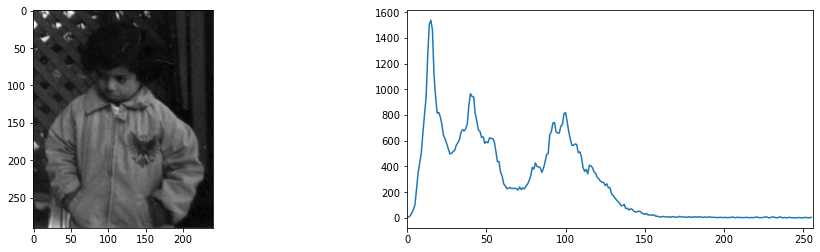

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("sample_img_child.jpg")
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=[16,4])
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [4]:
# Method 1 algorithm
# custom weighted percentile function to find c and d
# returns the index at which some percent of the sum of values of the array is below it
def weighted_percentile(arr, percentile):
    arr_percentile = np.sum(arr) * percentile / 100
    temp_sum = 0
    for i in range(np.size(arr)):
        temp_sum += arr[i]
        if temp_sum >= arr_percentile:
            return i
    return arr[-1]
c = weighted_percentile(hist, 5)
d = weighted_percentile(hist, 95)

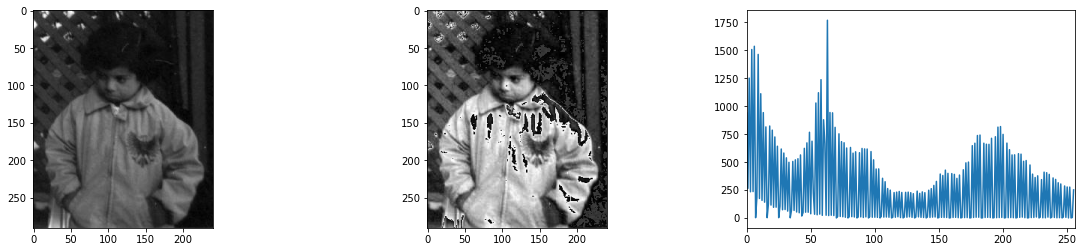

12+125


In [5]:
# assigns vals to a,b,c,d
# the descriptions for the vals were inconsistent in the textbook
#   and resulted in an all white picture
#   so I found different values that worked better at
#   https://academic.mu.edu/phys/matthysd/web226/Lab01.htm
a = 0
b = 255
scalar = (b-a)/(d-c)

# the algorithm
# new needs to be converted back to uint8 because it was multiplied by a scalar
new = (img - c) * scalar + a
new = new.astype("uint8")

hist2 = cv2.calcHist([new], [0], None, [256], [0,256])

plt.figure(figsize=[20,4])
plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(new)
plt.subplot(133), plt.plot(hist2)
plt.xlim([0,256])
plt.show()

print(f"{c}+{d}")

# for some reason the output image has black patches
# may be result of opencv vs numpy addition